## Predicting Zillow
By: Scott Schmidl, Data Scientist
12/16/2021

### Goal
The goal of this project is to understand what affects the price of a house on Zillow and predict, within a range, the price of a house.

### Description
I want to predict housing prices as accuractely as possible to help sellers and buyers maximize their quality of life.

### Initial Questions
1) Does a correlation exist between square feet and price?
2) Is there a correlation between number of bathrooms and price?
3) Is there a correlation between number of bedroooms and price?
4) Do houses in Los Angeles cost more than Orange County or Ventura?

### Data Dictionary
<table>
<thead><tr>
<th>Target</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>home_tax_value</td>
<td>Home price</td>
</tr>
</tbody>
</table>

<table>
<thead><tr>
<th>Variable</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>bedrooms</td>
<td>How many bedrooms are in a house</td>
</tr>
<tr>
<td>bathrooms</td>
<td>How many bathrooms are in a house</td>
</tr>
<tr>
<td>square_feet</td>
<td>Size of the house</td>
</tr>
<tr>
<td>year_built</td>
<td>Year in which the house was built</td>
</tr>
<tr>
<td>fips</td>
<td>County Code</td>
</tr>
<tr>
<td>county</td>
<td>County in which the house is located</td>
</tr>
</tbody>
</table>

### Wrangling Zillow
- To wrangle the Zillow data, I used the Zillow database in our MySQL server, and selected `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, `fips` for single famiy residences
- Please see wrangle.py for full query details
- Columns were renamed for readability
- The percentage of rows that had na's was small enough that I felt comfortable dropping the rows
- Houses that had zero bathrooms were dropped
- Houses with a size under 200 square feet were dropped
- I handled outliers by removeing a property outside of three standard deviations
- The `taxamount` column was dropped due to it being a potential for data leakage
- A `county` column was created from the `fips` codes

In [3]:
# import Wrangle module
from wrangle import Wrangle

# Instantiate Wrangle class and pull in data from csv or MySQL
train, validate, test = Wrangle().wrangle_zillow()

### Preparing Zillow
To get my X and y sets:
- Dropped the following columns: `home_tax_value`, `fips`, `year_built`, `county`
- Scaled the data by fitting on the X training set only and transforming all three X datasets

In [4]:
# import prepare and pandas module
from prepare import Prepare
import pandas as pd

# instaniate Prepare class and prep data
# This step preps converts train, val, and test into X and y machine learning.
p = Prepare()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = p.get_Xy(train, validate, test)

# This step scales the data for easier use by the algorithm
X_train_scaled, X_val_scaled, X_test_scaled, _ = p.scaling(X_train, X_val, X_test)

### The Issue
- How have prices changed over the years per county?

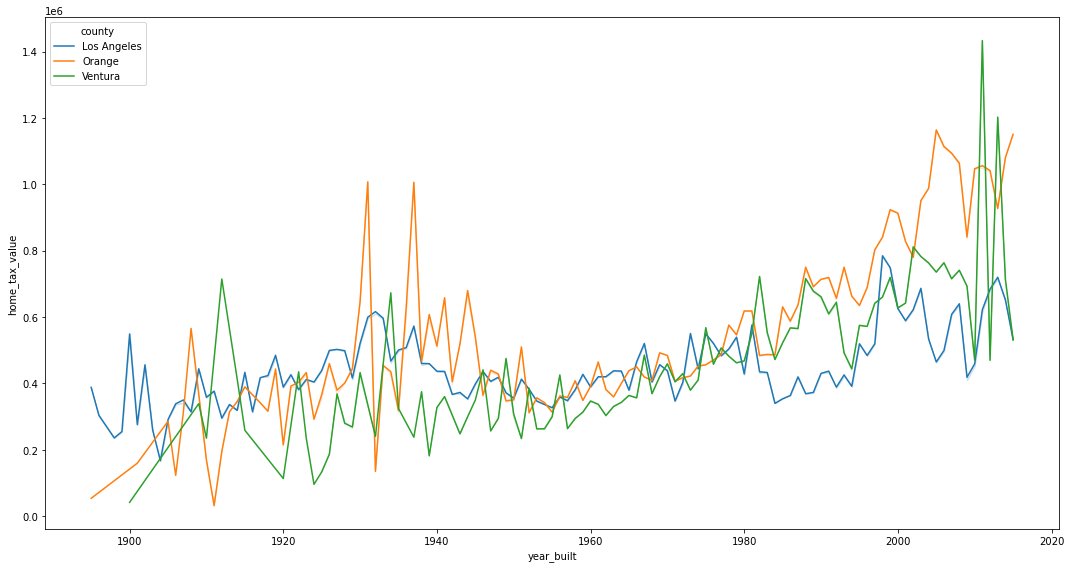

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.lineplot(x="year_built", y="home_tax_value", hue="county", ci=False,  data=train);
plt.tight_layout();

#### Take Away
- Prices have in fact continued to increase over the years per county, albeit, at a somewhat "roller coaster" type rate.

### Exploratory Data Analysis
- Signifcance Level for each statistical test will be 0.05
#### Question 1
- Does a correlation exist between square feet and price?

<p>H_o: There is no correlation between square feet and price.</p>
<p>H_a: There is a correlation between square feet and price.</p>

(0.54, 0.0)

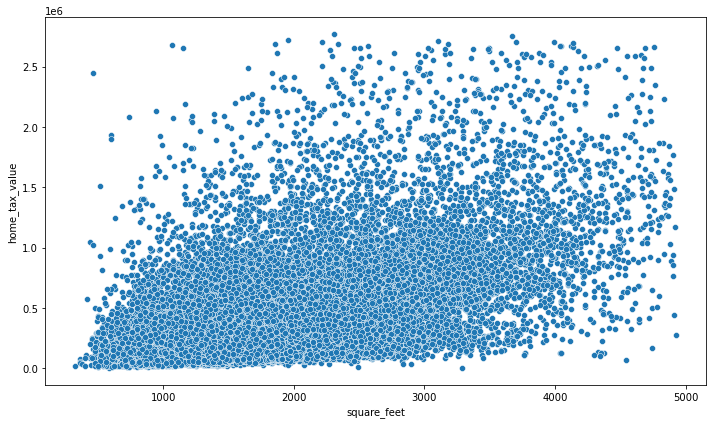

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="square_feet", y="home_tax_value", data=train)
plt.tight_layout();

# Import pearsonr from  scipy.stats for statistical modeling
from scipy.stats import pearsonr
r, pvalue = pearsonr(train["square_feet"], train["home_tax_value"])
round(r, 2), pvalue

#### Take Away
-

#### Question 2
- Is there a correlation between number of bedrooms and price?

<p>H_o: There is no correlation between number of bedrooms and price.</p>
<p>H_a: There is a correlation between number of bedrooms and price.</p>

(0.24, 0.0)

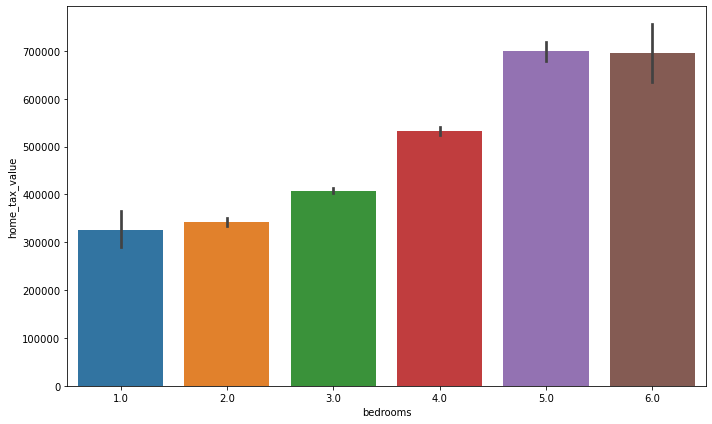

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="home_tax_value", data=train)
plt.tight_layout();

r, pvalue = pearsonr(train["bedrooms"], train["home_tax_value"])
round(r, 2), pvalue

#### Take Away
-

#### Question 3
- Is there a correlation between number of bathrooms and price?

<p>H_o: There is no correlation between number of bathrooms and price.</p>
<p>H_a: There is a correlation between number of bathrooms and price.</p>

(0.47, 0.0)

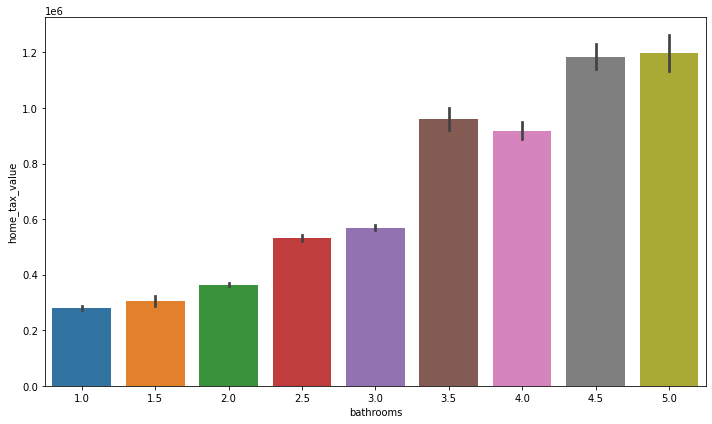

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bathrooms", y="home_tax_value", data=train)
plt.tight_layout();

r, pvalue = pearsonr(train["bathrooms"], train["home_tax_value"])
round(r, 2), pvalue

#### Take Away
-

#### Question 4
- Do houses in Los Angeles cost more than Orange County or Ventura?

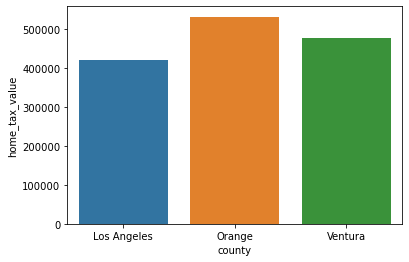

In [23]:
sns.barplot(x="county", y="home_tax_value", ci=False, data=train);

#### Take Away
-

#### Key Take Aways
- 

### Predicting Zillow Housing Prices
- 

### Baseline
- My baseline prediction will be predicting the mean housing price and examining the residuals.